<a href="https://colab.research.google.com/github/k4ilham/jupiter/blob/main/Deep_Neural_Network_Prostate_GSE6919_U95B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import relu
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings;
warnings.filterwarnings('ignore');

## Dataset

In [2]:
# Step 1: Load Data from CSV
df = pd.read_csv('https://raw.githubusercontent.com/k4ilham/dataset/main/Prostate_GSE6919_U95B.csv')

In [3]:
df.head(10)

,samples,type,41880_at,41881_at,41882_at,41883_at,41884_at,41885_at,41886_r_at,41887_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
0,GSM152992.CEL,primary_prostate_tumor,2.414076,4.113824,2.035911,3.102248,2.115578,1.775455,6.107839,2.160168,...,2.955998,2.910953,2.095267,1.617076,2.060144,1.962483,1.919590,2.034229,3.013061,2.208421
1,GSM152993.CEL,primary_prostate_tumor,2.385157,4.078664,2.123064,3.087631,2.254190,1.815183,5.708878,2.134447,...,3.196521,2.975412,2.249950,1.757867,2.352185,2.054990,1.970140,1.768459,4.701207,2.513560
2,GSM152994.CEL,primary_prostate_tumor,2.295522,4.085505,2.144344,3.071539,2.229422,1.985899,5.679248,2.100443,...,2.929904,2.857025,2.047436,1.625339,2.065674,1.955286,1.768858,1.666836,3.115166,2.136760
3,GSM152995.CEL,primary_prostate_tumor,2.260478,4.466391,2.206410,3.505265,2.605014,1.887307,5.935039,2.261295,...,3.578538,3.420946,2.736342,1.940826,2.713500,2.363843,2.194837,1.981020,3.141350,2.550041
4,GSM152996.CEL,primary_prostate_tumor,2.229731,4.291435,2.506255,3.220628,2.404673,1.886664,5.965917,2.274317,...,3.558184,3.083316,2.562048,1.923414,2.775842,2.323899,2.288732,2.772796,2.848256,2.803264
5,GSM152997.CEL,primary_prostate_tumor,2.323719,4.042794,2.219460,3.030761,2.539964,1.836586,5.970438,1.880250,...,3.442099,3.239850,2.373556,1.973410,2.563835,2.172953,1.635655,1.885491,2.978715,2.603510
6,GSM152998.CEL,primary_prostate_tumor,2.557032,4.196903,2.122405,3.495034,2.353686,2.100858,6.338756,2.019285,...,3.542867,3.178389,2.413796,2.038962,2.723099,2.359402,2.495400,2.365220,4.338475,3.266788
7,GSM152999.CEL,primary_prostate_tumor,2.441765,4.148545,1.968985,3.230116,2.240704,1.896051,6.166129,2.012576,...,3.363998,3.314865,2.345718,1.927122,2.600874,2.354630,2.256550,2.220849,3.935853,2.800777
8,GSM153000.CEL,primary_prostate_tumor,2.604707,4.234341,2.167552,3.394769,2.294088,2.089270,6.190621,2.030608,...,3.703331,3.263648,2.769345,2.183191,2.621211,2.543716,2.483545,2.353530,3.504419,2.823459
9,GSM153001.CEL,primary_prostate_tumor,2.364670,4.183144,1.866217,3.169024,2.371755,1.983816,5.748455,2.142535,...,3.077640,3.048728,2.230446,1.928804,2.466815,2.228590,2.063278,2.016133,2.955133,2.590789


In [4]:
X = df.drop(df.columns[[0, 1]], axis=1)
y = df['type']

In [5]:
df.isnull().sum().sum()

0

In [6]:
# Encoding label menjadi angka menggunakan LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [7]:
# Bagi data menjadi data pelatihan, validasi, dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# print(X_train.shape)

In [8]:
# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [9]:
# Membuat DataFrame kosong untuk menyimpan hasil evaluasi
results_df = pd.DataFrame(columns=['Optimizer', 'Hidden Layers', 'Validation Accuracy', 'Test Accuracy'])

# Fungsi untuk menambahkan atau memperbarui nilai dalam DataFrame
def update_results(optimizer, hidden_layers, val_acc, test_acc):
    global results_df
    # Mencari baris yang sesuai dengan kombinasi optimizer dan hidden layers
    mask = (results_df['Optimizer'] == optimizer) & (results_df['Hidden Layers'] == hidden_layers)
    # Jika kombinasi sudah ada, update nilai
    if mask.any():
        results_df.loc[mask, ['Validation Accuracy', 'Test Accuracy']] = val_acc, test_acc
    # Jika kombinasi belum ada, tambahkan baris baru
    else:
        results_df = pd.concat([results_df, pd.DataFrame({'Optimizer': [optimizer],
                                                          'Hidden Layers': [hidden_layers],
                                                          'Validation Accuracy': [val_acc],
                                                          'Test Accuracy': [test_acc]})],
                                ignore_index=True)

## DNN with 1 Hidden Layer 1000 Neuron and Relu Activation

In [10]:
# Function to build the DNN model with one hidden layer
def build_model_one_hidden():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Hidden layer with 1000 neurons and ReLU activation
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')          # Output layer with sigmoid activation
    ])
    return model

## DNN with 2 Hidden Layer 500 Neuron and Relu Activation

In [11]:
# Function to build the DNN model with two hidden layer
def build_model_two_hidden():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(500, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # 1st hidden layer with 500 neurons and ReLU activation
        tf.keras.layers.Dense(500, activation='relu'),                                   # 2nd hidden layer with 500 neurons and ReLU activation
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

## DNN with 3 Hidden Layer 250 Neuron and Relu Activation

In [12]:
# Function to build the DNN model with three hidden layer
def build_model_three_hidden():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(250, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dense(250, activation='relu'),                                   # Second hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dense(250, activation='relu'),                                   # Third hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

## DNN with 4 Hidden Layer 100 Neuron and Relu Activation

In [13]:
# Function to build the DNN model with four hidden layer
def build_model_four_hidden():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Second hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Third hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Fourth hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

In [14]:
# Build the DNN model
model_one_hidden_layer = build_model_one_hidden()
model_two_hidden_layer = build_model_two_hidden()
model_three_hidden_layer = build_model_three_hidden()
model_four_hidden_layer = build_model_four_hidden()

## SGD Optimizer

### Train and evaluate the model with 1 hidden Layer

In [15]:
# Melatih model dengan data pelatihan
# optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.01)  # Define the optimizer with learning rate
model_one_hidden_layer.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_one_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 2s 154ms/step - loss: 1.6133 - accuracy: 0.5443 - val_loss: 1.8351 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 1s 90ms/step - loss: 0.3069 - accuracy: 0.9114 - val_loss: 1.3945 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 1s 92ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.3996 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 1s 88ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.4008 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 1s 114ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.4026 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 1s 90ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.4043 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 1s 100ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.4059 - val_accuracy: 0.7000
Epoch 8/100
8/8 [

In [16]:
# Ambil loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)



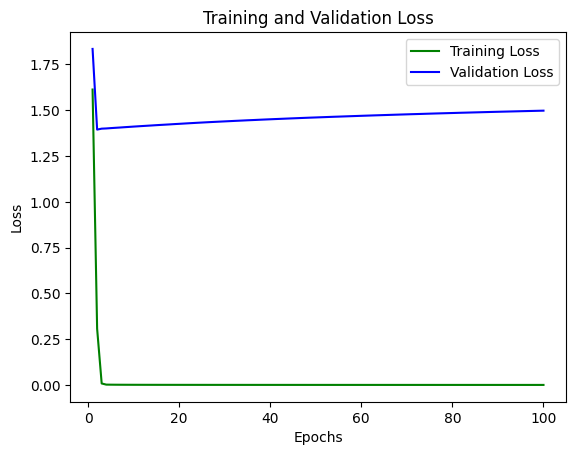

In [17]:
# Plot kurva loss
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_one_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_one_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)


1/1 [==============================] - 0s 137ms/step - loss: 1.4979 - accuracy: 0.7000
Model Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 177ms/step - loss: 0.5903 - accuracy: 0.7600
Best Model Test Accuracy: 0.7599999904632568


In [19]:
update_results('SGD', 1, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                  0.7           0.76


### Train and evaluate the model with 2 hidden Layer

In [20]:
# Melatih model dengan data pelatihan
model_two_hidden_layer.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_two_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 34ms/step - loss: 0.7460 - accuracy: 0.6329 - val_loss: 0.6685 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0679 - accuracy: 0.9873 - val_loss: 0.6095 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 0s 19ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.6226 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.6381 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.6473 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.6553 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.6624 - val_accuracy: 0.7000
Epoch 8/100
8/8 [===

In [21]:
# Ambil loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

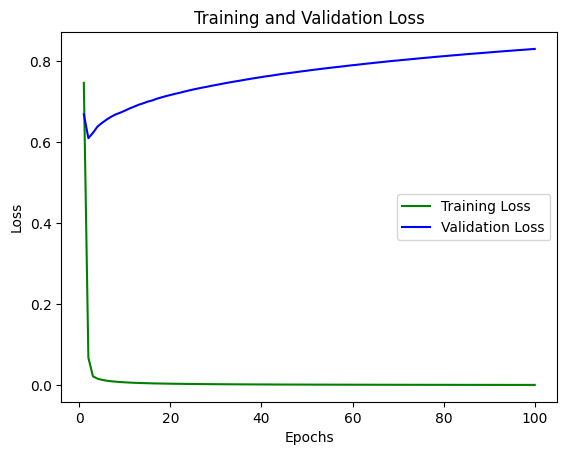

In [22]:
# Plot kurva loss
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_two_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 2 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# 5. Pilih model terbaik berdasarkan kinerja validasi
best_model = model_two_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# 6. Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 103ms/step - loss: 0.8297 - accuracy: 0.7000
Model 2 Hidden Layer SGD Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 99ms/step - loss: 2.4909 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [24]:
update_results('SGD', 2, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                  0.7           0.76
1       SGD             2                  0.7           0.60


### Train and evaluate the model with 3 hidden Layer

In [25]:
# Melatih model dengan data pelatihan
model_three_hidden_layer.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_three_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 0.7965 - accuracy: 0.5190 - val_loss: 0.5657 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 0.1586 - accuracy: 0.9873 - val_loss: 0.5582 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0729 - accuracy: 1.0000 - val_loss: 0.5687 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.5773 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 0.5809 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.5898 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.5988 - val_accuracy: 0.7500
Epoch 8/100
8/8 [===

In [26]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_three_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_three_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 101ms/step - loss: 0.8497 - accuracy: 0.7500
Model 3 Hidden Layer SGD Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 99ms/step - loss: 0.5354 - accuracy: 0.6800
Best Model Test Accuracy: 0.6800000071525574


In [27]:
update_results('SGD', 3, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.70           0.76
1       SGD             2                 0.70           0.60
2       SGD             3                 0.75           0.68


### Train and evaluate the model with 4 hidden Layer

In [28]:
# Melatih model dengan data pelatihan
model_four_hidden_layer.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_four_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 0.6765 - accuracy: 0.5823 - val_loss: 0.5917 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.3293 - accuracy: 0.9873 - val_loss: 0.5530 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.2042 - accuracy: 1.0000 - val_loss: 0.5313 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.1387 - accuracy: 1.0000 - val_loss: 0.5282 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1007 - accuracy: 1.0000 - val_loss: 0.5263 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0751 - accuracy: 1.0000 - val_loss: 0.5352 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 0.5402 - val_accuracy: 0.7000
Epoch 8/100
8/8 [===

In [29]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_four_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_four_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 106ms/step - loss: 0.9128 - accuracy: 0.7000
Model 3 Hidden Layer SGD Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 117ms/step - loss: 1.5719 - accuracy: 0.5200
Best Model Test Accuracy: 0.5199999809265137


In [30]:
update_results('SGD', 4, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.70           0.76
1       SGD             2                 0.70           0.60
2       SGD             3                 0.75           0.68
3       SGD             4                 0.70           0.52


## Adam Optimizer

### Train and evaluate the model with 1 hidden Layer with Adam Optimizer

In [31]:
# Melatih model dengan data pelatihan
# optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001)  # Define the optimizer with learning rate
model_one_hidden_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_one_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 130ms/step - loss: 5.4076 - accuracy: 0.6962 - val_loss: 9.6629 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 1s 114ms/step - loss: 5.4742 - accuracy: 0.8228 - val_loss: 11.1155 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 1s 114ms/step - loss: 1.0444 - accuracy: 0.9114 - val_loss: 14.4273 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 1s 116ms/step - loss: 0.1728 - accuracy: 0.9873 - val_loss: 17.1176 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 1s 184ms/step - loss: 0.3341 - accuracy: 0.9747 - val_loss: 18.8256 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 1s 116ms/step - loss: 4.1837e-06 - accuracy: 1.0000 - val_loss: 21.8398 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 1s 116ms/step - loss: 0.0130 - accuracy: 0.9873 - val_loss: 21.4322 - val_accuracy: 0.7000
Epo

In [32]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_one_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 1 Hidden Layer Adam Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_one_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 106ms/step - loss: 20.7603 - accuracy: 0.7000
Model 1 Hidden Layer Adam Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 98ms/step - loss: 3.0400 - accuracy: 0.6800
Best Model Test Accuracy: 0.6800000071525574


In [33]:
update_results('ADAM', 1, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.70           0.76
1       SGD             2                 0.70           0.60
2       SGD             3                 0.75           0.68
3       SGD             4                 0.70           0.52
4      ADAM             1                 0.70           0.68


### Train and evaluate the model with 2 hidden Layer with Adam Optimizer

In [34]:
# Melatih model dengan data pelatihan
model_two_hidden_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_two_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 62ms/step - loss: 2.4851 - accuracy: 0.6962 - val_loss: 4.2102 - val_accuracy: 0.5500
Epoch 2/100
8/8 [==============================] - 0s 41ms/step - loss: 3.3786 - accuracy: 0.8101 - val_loss: 4.8779 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 0s 40ms/step - loss: 0.5216 - accuracy: 0.9114 - val_loss: 7.9872 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 42ms/step - loss: 0.5318 - accuracy: 0.9367 - val_loss: 6.2983 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 0s 39ms/step - loss: 0.5181 - accuracy: 0.9367 - val_loss: 11.2620 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 0s 41ms/step - loss: 0.1399 - accuracy: 0.9747 - val_loss: 12.6989 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 46ms/step - loss: 0.1015 - accuracy: 0.9747 - val_loss: 11.2850 - val_accuracy: 0.7000
Epoch 8/100
8/8 [

In [35]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_two_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 2 Hidden Layer Adam Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_two_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 96ms/step - loss: 10.1903 - accuracy: 0.6500
Model 2 Hidden Layer Adam Optimizer Validation Accuracy: 0.6499999761581421
1/1 [==============================] - 0s 105ms/step - loss: 9.0989 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [36]:
update_results('ADAM', 2, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.70           0.76
1       SGD             2                 0.70           0.60
2       SGD             3                 0.75           0.68
3       SGD             4                 0.70           0.52
4      ADAM             1                 0.70           0.68
5      ADAM             2                 0.65           0.60


### Train and evaluate the model with 3 hidden Layer with Adam Optimizer

In [37]:
# Melatih model dengan data pelatihan
model_three_hidden_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_three_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 36ms/step - loss: 1.1883 - accuracy: 0.7975 - val_loss: 2.6267 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 0s 21ms/step - loss: 1.4797 - accuracy: 0.8608 - val_loss: 3.0994 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 0s 21ms/step - loss: 1.1185 - accuracy: 0.8354 - val_loss: 3.7809 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 0s 21ms/step - loss: 0.4829 - accuracy: 0.9494 - val_loss: 2.3607 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0299 - accuracy: 0.9873 - val_loss: 2.3151 - val_accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 0s 19ms/step - loss: 8.4646e-04 - accuracy: 1.0000 - val_loss: 2.5192 - val_accuracy: 0.8500
Epoch 7/100
8/8 [==============================] - 0s 19ms/step - loss: 7.6685e-05 - accuracy: 1.0000 - val_loss: 2.6937 - val_accuracy: 0.8000
Epoch 8/100


In [38]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_three_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer Adam Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_three_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 114ms/step - loss: 2.9431 - accuracy: 0.7500
Model 3 Hidden Layer Adam Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 103ms/step - loss: 19.9428 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [39]:
update_results('ADAM', 3, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.70           0.76
1       SGD             2                 0.70           0.60
2       SGD             3                 0.75           0.68
3       SGD             4                 0.70           0.52
4      ADAM             1                 0.70           0.68
5      ADAM             2                 0.65           0.60
6      ADAM             3                 0.75           0.60


### Train and evaluate the model with 4 hidden Layer with Adam Optimizer

In [40]:
# Melatih model dengan data pelatihan
model_four_hidden_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_four_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 0.7121 - accuracy: 0.8354 - val_loss: 1.2140 - val_accuracy: 0.8000
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.8836 - accuracy: 0.8101 - val_loss: 2.1826 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.2608 - accuracy: 0.9114 - val_loss: 2.5354 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1717 - accuracy: 0.9620 - val_loss: 2.8455 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.5713 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0429 - accuracy: 0.9747 - val_loss: 3.0235 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.3810 - accuracy: 0.9747 - val_loss: 3.3553 - val_accuracy: 0.7500
Epoch 8/100
8/8 [===

In [41]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_four_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 4 Hidden Layer Adam Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_four_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 103ms/step - loss: 3.4425 - accuracy: 0.6000
Model 4 Hidden Layer Adam Optimizer Validation Accuracy: 0.6000000238418579
1/1 [==============================] - 0s 100ms/step - loss: 11.3297 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [42]:
update_results('ADAM', 4, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.70           0.76
1       SGD             2                 0.70           0.60
2       SGD             3                 0.75           0.68
3       SGD             4                 0.70           0.52
4      ADAM             1                 0.70           0.68
5      ADAM             2                 0.65           0.60
6      ADAM             3                 0.75           0.60
7      ADAM             4                 0.60           0.60


## AdaGrad Optimizer

### Train and evaluate the model with 1 hidden Layer with AdaGrad Optimizer

In [43]:
# Melatih model dengan data pelatihan
optimizer_adagrad = tf.keras.optimizers.Adagrad()
model_one_hidden_layer.compile(optimizer=optimizer_adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_one_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 104ms/step - loss: 1.5090e-08 - accuracy: 1.0000 - val_loss: 20.7603 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 1s 88ms/step - loss: 1.5090e-08 - accuracy: 1.0000 - val_loss: 20.7603 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 1s 90ms/step - loss: 1.5090e-08 - accuracy: 1.0000 - val_loss: 20.7603 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 1s 113ms/step - loss: 1.5090e-08 - accuracy: 1.0000 - val_loss: 20.7603 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 1s 133ms/step - loss: 1.5090e-08 - accuracy: 1.0000 - val_loss: 20.7603 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 1s 89ms/step - loss: 1.5090e-08 - accuracy: 1.0000 - val_loss: 20.7603 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 1s 86ms/step - loss: 1.5090e-08 - accuracy: 1.0000 - val_loss: 20.7603 - val

In [44]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_one_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 1 Hidden Layer AdaGrad Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_one_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 98ms/step - loss: 20.7603 - accuracy: 0.7000
Model 1 Hidden Layer AdaGrad Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 97ms/step - loss: 3.0402 - accuracy: 0.6800
Best Model Test Accuracy: 0.6800000071525574


In [45]:
update_results('AdaGrad', 1, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.70           0.76
1       SGD             2                 0.70           0.60
2       SGD             3                 0.75           0.68
3       SGD             4                 0.70           0.52
4      ADAM             1                 0.70           0.68
5      ADAM             2                 0.65           0.60
6      ADAM             3                 0.75           0.60
7      ADAM             4                 0.60           0.60
8   AdaGrad             1                 0.70           0.68


### Train and evaluate the model with 2 hidden Layer with AdaGrad Optimizer

In [46]:
# Melatih model dengan data pelatihan
optimizer_adagrad = tf.keras.optimizers.Adagrad()
model_two_hidden_layer.compile(optimizer=optimizer_adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_two_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 46ms/step - loss: 4.4062e-07 - accuracy: 1.0000 - val_loss: 10.1903 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 32ms/step - loss: 4.4062e-07 - accuracy: 1.0000 - val_loss: 10.1903 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 0s 33ms/step - loss: 4.4062e-07 - accuracy: 1.0000 - val_loss: 10.1903 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 0s 34ms/step - loss: 4.4062e-07 - accuracy: 1.0000 - val_loss: 10.1903 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 34ms/step - loss: 4.4062e-07 - accuracy: 1.0000 - val_loss: 10.1903 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 0s 32ms/step - loss: 4.4062e-07 - accuracy: 1.0000 - val_loss: 10.1903 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 0s 30ms/step - loss: 4.4062e-07 - accuracy: 1.0000 - val_loss: 10.1903 - val_ac

In [47]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_two_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 2 Hidden Layer AdaGrad Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_two_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 409ms/step - loss: 10.1908 - accuracy: 0.6500
Model 2 Hidden Layer AdaGrad Optimizer Validation Accuracy: 0.6499999761581421
1/1 [==============================] - 0s 135ms/step - loss: 9.1010 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [48]:
update_results('AdaGrad', 2, val_acc, test_acc)
print(results_df)

  Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0       SGD             1                 0.70           0.76
1       SGD             2                 0.70           0.60
2       SGD             3                 0.75           0.68
3       SGD             4                 0.70           0.52
4      ADAM             1                 0.70           0.68
5      ADAM             2                 0.65           0.60
6      ADAM             3                 0.75           0.60
7      ADAM             4                 0.60           0.60
8   AdaGrad             1                 0.70           0.68
9   AdaGrad             2                 0.65           0.60


### Train and evaluate the model with 3 hidden Layer with AdaGrad Optimizer

In [49]:
# Melatih model dengan data pelatihan
optimizer_adagrad = tf.keras.optimizers.Adagrad()
model_three_hidden_layer.compile(optimizer=optimizer_adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_three_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 36ms/step - loss: 7.4845e-07 - accuracy: 1.0000 - val_loss: 2.9431 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 7.4694e-07 - accuracy: 1.0000 - val_loss: 2.9431 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 0s 18ms/step - loss: 7.4694e-07 - accuracy: 1.0000 - val_loss: 2.9431 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 7.4694e-07 - accuracy: 1.0000 - val_loss: 2.9431 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 7.4694e-07 - accuracy: 1.0000 - val_loss: 2.9431 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 17ms/step - loss: 7.4694e-07 - accuracy: 1.0000 - val_loss: 2.9431 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 17ms/step - loss: 7.4694e-07 - accuracy: 1.0000 - val_loss: 2.9432 - val_accuracy:

In [50]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_three_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer AdaGrad Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_three_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 105ms/step - loss: 2.9437 - accuracy: 0.7500
Model 3 Hidden Layer AdaGrad Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 98ms/step - loss: 19.9436 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [51]:
update_results('AdaGrad', 3, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.70           0.76
1        SGD             2                 0.70           0.60
2        SGD             3                 0.75           0.68
3        SGD             4                 0.70           0.52
4       ADAM             1                 0.70           0.68
5       ADAM             2                 0.65           0.60
6       ADAM             3                 0.75           0.60
7       ADAM             4                 0.60           0.60
8    AdaGrad             1                 0.70           0.68
9    AdaGrad             2                 0.65           0.60
10   AdaGrad             3                 0.75           0.60


### Train and evaluate the model with 4 hidden Layer with AdaGrad Optimizer

In [52]:
# Melatih model dengan data pelatihan
optimizer_adagrad = tf.keras.optimizers.Adagrad()
model_four_hidden_layer.compile(optimizer=optimizer_adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_four_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 8.7231e-06 - accuracy: 1.0000 - val_loss: 3.4425 - val_accuracy: 0.6000
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 8.7216e-06 - accuracy: 1.0000 - val_loss: 3.4425 - val_accuracy: 0.6000
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 8.7186e-06 - accuracy: 1.0000 - val_loss: 3.4425 - val_accuracy: 0.6000
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 8.7171e-06 - accuracy: 1.0000 - val_loss: 3.4425 - val_accuracy: 0.6000
Epoch 5/100
8/8 [==============================] - 0s 15ms/step - loss: 8.7125e-06 - accuracy: 1.0000 - val_loss: 3.4425 - val_accuracy: 0.6000
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 8.7095e-06 - accuracy: 1.0000 - val_loss: 3.4425 - val_accuracy: 0.6000
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 8.7095e-06 - accuracy: 1.0000 - val_loss: 3.4425 - val_accuracy: 

In [53]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_four_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 4 Hidden Layer AdaGrad Optimizer Validation Accuracy:", val_acc)
# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_four_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 106ms/step - loss: 3.4437 - accuracy: 0.6000
Model 4 Hidden Layer AdaGrad Optimizer Validation Accuracy: 0.6000000238418579
1/1 [==============================] - 0s 99ms/step - loss: 11.3314 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [54]:
update_results('AdaGrad', 4, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.70           0.76
1        SGD             2                 0.70           0.60
2        SGD             3                 0.75           0.68
3        SGD             4                 0.70           0.52
4       ADAM             1                 0.70           0.68
5       ADAM             2                 0.65           0.60
6       ADAM             3                 0.75           0.60
7       ADAM             4                 0.60           0.60
8    AdaGrad             1                 0.70           0.68
9    AdaGrad             2                 0.65           0.60
10   AdaGrad             3                 0.75           0.60
11   AdaGrad             4                 0.60           0.60


## RMSProp Optimizer

### Train and evaluate the model with 1 hidden Layer with RMSProp Optimizer

In [55]:
# Melatih model dengan data pelatihan
optimizer_rmsprop = tf.keras.optimizers.RMSprop()
model_one_hidden_layer.compile(optimizer=optimizer_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_one_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 111ms/step - loss: 1.5090e-08 - accuracy: 1.0000 - val_loss: 20.7604 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 1s 96ms/step - loss: 1.5090e-08 - accuracy: 1.0000 - val_loss: 20.7605 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 1s 100ms/step - loss: 1.5090e-08 - accuracy: 1.0000 - val_loss: 20.7606 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 1s 133ms/step - loss: 1.3581e-08 - accuracy: 1.0000 - val_loss: 20.7607 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 1s 127ms/step - loss: 1.3581e-08 - accuracy: 1.0000 - val_loss: 20.7608 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 1s 97ms/step - loss: 1.3581e-08 - accuracy: 1.0000 - val_loss: 20.7609 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 1s 98ms/step - loss: 1.3581e-08 - accuracy: 1.0000 - val_loss: 20.7610 - va

In [56]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_one_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 1 Hidden Layer RMSprop Optimizer Validation Accuracy:", val_acc)
# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_one_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 96ms/step - loss: 20.7713 - accuracy: 0.7000
Model 1 Hidden Layer RMSprop Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 93ms/step - loss: 3.2224 - accuracy: 0.6400
Best Model Test Accuracy: 0.6399999856948853


In [57]:
update_results('RMSprop', 1, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.70           0.76
1        SGD             2                 0.70           0.60
2        SGD             3                 0.75           0.68
3        SGD             4                 0.70           0.52
4       ADAM             1                 0.70           0.68
5       ADAM             2                 0.65           0.60
6       ADAM             3                 0.75           0.60
7       ADAM             4                 0.60           0.60
8    AdaGrad             1                 0.70           0.68
9    AdaGrad             2                 0.65           0.60
10   AdaGrad             3                 0.75           0.60
11   AdaGrad             4                 0.60           0.60
12   RMSprop             1                 0.70           0.64


### Train and evaluate the model with 2 hidden Layer with RMSProp Optimizer

In [58]:
# Melatih model dengan data pelatihan
optimizer_rmsprop = tf.keras.optimizers.RMSprop()
model_two_hidden_layer.compile(optimizer=optimizer_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_two_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 55ms/step - loss: 4.4062e-07 - accuracy: 1.0000 - val_loss: 10.1960 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 40ms/step - loss: 4.1044e-07 - accuracy: 1.0000 - val_loss: 10.2011 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 0s 41ms/step - loss: 3.8177e-07 - accuracy: 1.0000 - val_loss: 10.2057 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 0s 39ms/step - loss: 3.5762e-07 - accuracy: 1.0000 - val_loss: 10.2098 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 35ms/step - loss: 3.3650e-07 - accuracy: 1.0000 - val_loss: 10.2137 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 0s 37ms/step - loss: 3.1990e-07 - accuracy: 1.0000 - val_loss: 10.2175 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 0s 35ms/step - loss: 3.0179e-07 - accuracy: 1.0000 - val_loss: 10.2209 - val_ac

In [59]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_two_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 2 Hidden Layer RMSprop Optimizer Validation Accuracy:", val_acc)
# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_two_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 98ms/step - loss: 10.3283 - accuracy: 0.6500
Model 2 Hidden Layer RMSprop Optimizer Validation Accuracy: 0.6499999761581421
1/1 [==============================] - 0s 102ms/step - loss: 9.5729 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [60]:
update_results('RMSprop', 2, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.70           0.76
1        SGD             2                 0.70           0.60
2        SGD             3                 0.75           0.68
3        SGD             4                 0.70           0.52
4       ADAM             1                 0.70           0.68
5       ADAM             2                 0.65           0.60
6       ADAM             3                 0.75           0.60
7       ADAM             4                 0.60           0.60
8    AdaGrad             1                 0.70           0.68
9    AdaGrad             2                 0.65           0.60
10   AdaGrad             3                 0.75           0.60
11   AdaGrad             4                 0.60           0.60
12   RMSprop             1                 0.70           0.64
13   RMSprop             2                 0.65           0.60


### Train and evaluate the model with 3 hidden Layer with RMSProp Optimizer

In [61]:
# Melatih model dengan data pelatihan
optimizer_rmsprop = tf.keras.optimizers.RMSprop()
model_three_hidden_layer.compile(optimizer=optimizer_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_three_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 37ms/step - loss: 7.4392e-07 - accuracy: 1.0000 - val_loss: 2.9510 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 22ms/step - loss: 6.7904e-07 - accuracy: 1.0000 - val_loss: 2.9573 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 0s 20ms/step - loss: 6.2924e-07 - accuracy: 1.0000 - val_loss: 2.9633 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 20ms/step - loss: 5.9303e-07 - accuracy: 1.0000 - val_loss: 2.9687 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 24ms/step - loss: 5.5379e-07 - accuracy: 1.0000 - val_loss: 2.9736 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 22ms/step - loss: 5.2663e-07 - accuracy: 1.0000 - val_loss: 2.9783 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 21ms/step - loss: 5.0551e-07 - accuracy: 1.0000 - val_loss: 2.9827 - val_accuracy:

In [62]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_three_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer RMSprop Optimizer Validation Accuracy:", val_acc)
# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_three_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 146ms/step - loss: 3.1384 - accuracy: 0.7500
Model 3 Hidden Layer RMSprop Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 152ms/step - loss: 20.9274 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [63]:
update_results('RMSprop', 3, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.70           0.76
1        SGD             2                 0.70           0.60
2        SGD             3                 0.75           0.68
3        SGD             4                 0.70           0.52
4       ADAM             1                 0.70           0.68
5       ADAM             2                 0.65           0.60
6       ADAM             3                 0.75           0.60
7       ADAM             4                 0.60           0.60
8    AdaGrad             1                 0.70           0.68
9    AdaGrad             2                 0.65           0.60
10   AdaGrad             3                 0.75           0.60
11   AdaGrad             4                 0.60           0.60
12   RMSprop             1                 0.70           0.64
13   RMSprop             2                 0.65           0.60
14   RMSprop             3                 0.75        

### Train and evaluate the model with 4 hidden Layer with RMSProp Optimizer

In [64]:
# Melatih model dengan data pelatihan
optimizer_rmsprop = tf.keras.optimizers.RMSprop()
model_four_hidden_layer.compile(optimizer=optimizer_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_four_hidden_layer.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 8.4153e-06 - accuracy: 1.0000 - val_loss: 3.4626 - val_accuracy: 0.6000
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 6.9758e-06 - accuracy: 1.0000 - val_loss: 3.4760 - val_accuracy: 0.6000
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 5.7581e-06 - accuracy: 1.0000 - val_loss: 3.4940 - val_accuracy: 0.6000
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 5.0535e-06 - accuracy: 1.0000 - val_loss: 3.5094 - val_accuracy: 0.6000
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 4.4424e-06 - accuracy: 1.0000 - val_loss: 3.5221 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 4.0033e-06 - accuracy: 1.0000 - val_loss: 3.5366 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 3.6260e-06 - accuracy: 1.0000 - val_loss: 3.5484 - val_accuracy: 

In [65]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_four_hidden_layer.evaluate(X_val_scaled, y_val)
print("Model 4 Hidden Layer RMSprop Optimizer Validation Accuracy:", val_acc)
# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_four_hidden_layer  # Misalnya, model pertama dianggap sebagai model terbaik
# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 156ms/step - loss: 3.9048 - accuracy: 0.6500
Model 4 Hidden Layer RMSprop Optimizer Validation Accuracy: 0.6499999761581421
1/1 [==============================] - 0s 125ms/step - loss: 13.2340 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [66]:
update_results('RMSprop', 4, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.70           0.76
1        SGD             2                 0.70           0.60
2        SGD             3                 0.75           0.68
3        SGD             4                 0.70           0.52
4       ADAM             1                 0.70           0.68
5       ADAM             2                 0.65           0.60
6       ADAM             3                 0.75           0.60
7       ADAM             4                 0.60           0.60
8    AdaGrad             1                 0.70           0.68
9    AdaGrad             2                 0.65           0.60
10   AdaGrad             3                 0.75           0.60
11   AdaGrad             4                 0.60           0.60
12   RMSprop             1                 0.70           0.64
13   RMSprop             2                 0.65           0.60
14   RMSprop             3                 0.75        

## Hasil Optimizer

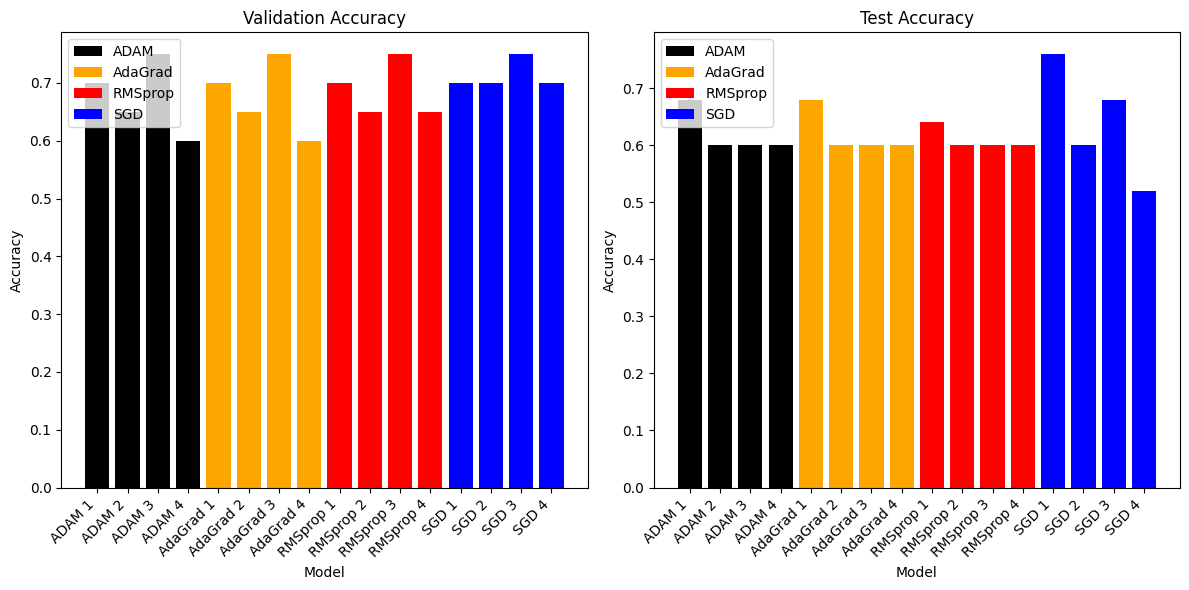

In [67]:
import matplotlib.pyplot as plt

# Membuat palet warna yang berbeda untuk setiap optimizer
colors = {'SGD': 'blue', 'Adam': 'green', 'AdaGrad': 'orange', 'RMSprop': 'red'}

# Membuat subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Grafik akurasi validasi
for optimizer, group in results_df.groupby('Optimizer'):
    axs[0].bar(group['Optimizer'] + ' ' + group['Hidden Layers'].astype(str), group['Validation Accuracy'], color=colors.get(optimizer, 'black'), label=optimizer)
axs[0].set_title('Validation Accuracy')
axs[0].set_xlabel('Model', fontsize=10)  # Penyesuaian ukuran font
axs[0].set_ylabel('Accuracy')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')  # Rotasi label sumbu x
axs[0].legend()

# Grafik akurasi pengujian
for optimizer, group in results_df.groupby('Optimizer'):
    axs[1].bar(group['Optimizer'] + ' ' + group['Hidden Layers'].astype(str), group['Test Accuracy'], color=colors.get(optimizer, 'black'), label=optimizer)
axs[1].set_title('Test Accuracy')
axs[1].set_xlabel('Model', fontsize=10)  # Penyesuaian ukuran font
axs[1].set_ylabel('Accuracy')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')  # Rotasi label sumbu x
axs[1].legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [68]:
from IPython.display import display

# Menampilkan DataFrame
display(results_df)


,Optimizer,Hidden Layers,Validation Accuracy,Test Accuracy
0,SGD,1,0.70,0.76
1,SGD,2,0.70,0.60
2,SGD,3,0.75,0.68
3,SGD,4,0.70,0.52
4,ADAM,1,0.70,0.68
5,ADAM,2,0.65,0.60
6,ADAM,3,0.75,0.60
7,ADAM,4,0.60,0.60
8,AdaGrad,1,0.70,0.68
9,AdaGrad,2,0.65,0.60


In [69]:
# Temukan indeks baris dengan akurasi pengujian tertinggi dan terendah
best_model_idx = results_df['Test Accuracy'].idxmax()
worst_model_idx = results_df['Test Accuracy'].idxmin()

# Dapatkan informasi tentang model dengan akurasi pengujian tertinggi dan terendah
best_model_info = results_df.loc[best_model_idx]
worst_model_info = results_df.loc[worst_model_idx]

print("Model dengan akurasi pengujian tertinggi:")
print(best_model_info)
print("\nModel dengan akurasi pengujian terendah:")
print(worst_model_info)


Model dengan akurasi pengujian tertinggi:
Optimizer               SGD
Hidden Layers             1
Validation Accuracy     0.7
Test Accuracy          0.76
Name: 0, dtype: object

Model dengan akurasi pengujian terendah:
Optimizer               SGD
Hidden Layers             4
Validation Accuracy     0.7
Test Accuracy          0.52
Name: 3, dtype: object


## Menambahkan Dropout 50%

In [70]:
# Function to build the DNN model with one hidden layer
def build_model_one_hidden_with_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Hidden layer with 1000 neurons and ReLU activation
        tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate of 50%
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')          # Output layer with sigmoid activation
    ])
    return model

# Function to build the DNN model with two hidden layer
def build_model_two_hidden_with_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(500, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # 1st hidden layer with 500 neurons and ReLU activation
        tf.keras.layers.Dense(500, activation='relu'),                                   # 2nd hidden layer with 500 neurons and ReLU activation
        tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate of 50%
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

# Function to build the DNN model with three hidden layer
def build_model_three_hidden_with_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(250, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dense(250, activation='relu'),                                   # Second hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dense(250, activation='relu'),                                   # Third hidden layer with 250 neurons and ReLU activation
        tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate of 50%
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

# Function to build the DNN model with four hidden layer
def build_model_four_hidden_with_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Second hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Third hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dense(100, activation='relu'),                                   # Fourth hidden layer with 100 neurons and ReLU activation
        tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate of 50%
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='sigmoid')         # Output layer with sigmoid activation
    ])
    return model

In [71]:
# Build the DNN model
model_one_hidden_layer_with_dropout = build_model_one_hidden_with_dropout()
model_two_hidden_layer_with_dropout = build_model_two_hidden_with_dropout()
model_three_hidden_layer_with_dropout = build_model_three_hidden_with_dropout()
model_four_hidden_layer_with_dropout = build_model_four_hidden_with_dropout()

### SGD - Train and evaluate the model with 1 hidden Layer

In [72]:
# Melatih model dengan data pelatihan
# optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.01)  # Define the optimizer with learning rate
model_one_hidden_layer_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_one_hidden_layer_with_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 54ms/step - loss: 1.6524 - accuracy: 0.5823 - val_loss: 2.5821 - val_accuracy: 0.6000
Epoch 2/100
8/8 [==============================] - 0s 39ms/step - loss: 0.9119 - accuracy: 0.7975 - val_loss: 2.0558 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 0s 40ms/step - loss: 0.1065 - accuracy: 0.9620 - val_loss: 1.5822 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0325 - accuracy: 0.9873 - val_loss: 1.6046 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0301 - accuracy: 0.9873 - val_loss: 1.4639 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.5010 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.5264 - val_accuracy: 0.7500
Epoch 8/100
8/8 [===

In [73]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_one_hidden_layer_with_dropout.evaluate(X_val_scaled, y_val)
print("Model Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_one_hidden_layer_with_dropout  # Misalnya, model pertama dianggap sebagai model terbaik
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 107ms/step - loss: 1.7272 - accuracy: 0.7500
Model Validation Accuracy: 0.75
1/1 [==============================] - 0s 104ms/step - loss: 3.8164 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [74]:
update_results('SGD+D', 1, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.70           0.76
1        SGD             2                 0.70           0.60
2        SGD             3                 0.75           0.68
3        SGD             4                 0.70           0.52
4       ADAM             1                 0.70           0.68
5       ADAM             2                 0.65           0.60
6       ADAM             3                 0.75           0.60
7       ADAM             4                 0.60           0.60
8    AdaGrad             1                 0.70           0.68
9    AdaGrad             2                 0.65           0.60
10   AdaGrad             3                 0.75           0.60
11   AdaGrad             4                 0.60           0.60
12   RMSprop             1                 0.70           0.64
13   RMSprop             2                 0.65           0.60
14   RMSprop             3                 0.75        

### SGD - Train and evaluate the model with 2 hidden Layer

In [75]:
# Melatih model dengan data pelatihan
model_two_hidden_layer_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_two_hidden_layer_with_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 37ms/step - loss: 1.1840 - accuracy: 0.5823 - val_loss: 0.9667 - val_accuracy: 0.5500
Epoch 2/100
8/8 [==============================] - 0s 23ms/step - loss: 0.2849 - accuracy: 0.8861 - val_loss: 0.6517 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0794 - accuracy: 0.9747 - val_loss: 0.6925 - val_accuracy: 0.8000
Epoch 4/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.7061 - val_accuracy: 0.8000
Epoch 5/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.7052 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.7021 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.7116 - val_accuracy: 0.7000
Epoch 8/100
8/8 [===

In [76]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_two_hidden_layer_with_dropout.evaluate(X_val_scaled, y_val)
print("Model 2 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# 5. Pilih model terbaik berdasarkan kinerja validasi
best_model = model_two_hidden_layer_with_dropout  # Misalnya, model pertama dianggap sebagai model terbaik

# 6. Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 103ms/step - loss: 1.0285 - accuracy: 0.7000
Model 2 Hidden Layer SGD Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 104ms/step - loss: 2.9643 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [77]:
update_results('SGD+D', 2, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.70           0.76
1        SGD             2                 0.70           0.60
2        SGD             3                 0.75           0.68
3        SGD             4                 0.70           0.52
4       ADAM             1                 0.70           0.68
5       ADAM             2                 0.65           0.60
6       ADAM             3                 0.75           0.60
7       ADAM             4                 0.60           0.60
8    AdaGrad             1                 0.70           0.68
9    AdaGrad             2                 0.65           0.60
10   AdaGrad             3                 0.75           0.60
11   AdaGrad             4                 0.60           0.60
12   RMSprop             1                 0.70           0.64
13   RMSprop             2                 0.65           0.60
14   RMSprop             3                 0.75        

### SGD - Train and evaluate the model with 3 hidden Layer

In [78]:
# Melatih model dengan data pelatihan
model_three_hidden_layer_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_three_hidden_layer_with_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 31ms/step - loss: 0.8785 - accuracy: 0.4557 - val_loss: 0.5126 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 0.3458 - accuracy: 0.8608 - val_loss: 0.5367 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1552 - accuracy: 0.9620 - val_loss: 0.5231 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1194 - accuracy: 0.9747 - val_loss: 0.5333 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0626 - accuracy: 1.0000 - val_loss: 0.5362 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 0.5329 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0449 - accuracy: 1.0000 - val_loss: 0.5426 - val_accuracy: 0.7000
Epoch 8/100
8/8 [===

In [79]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_three_hidden_layer_with_dropout.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_three_hidden_layer_with_dropout  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 116ms/step - loss: 0.8129 - accuracy: 0.7000
Model 3 Hidden Layer SGD Optimizer Validation Accuracy: 0.699999988079071
1/1 [==============================] - 0s 99ms/step - loss: 1.1450 - accuracy: 0.6000
Best Model Test Accuracy: 0.6000000238418579


In [80]:
update_results('SGD+D', 3, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.70           0.76
1        SGD             2                 0.70           0.60
2        SGD             3                 0.75           0.68
3        SGD             4                 0.70           0.52
4       ADAM             1                 0.70           0.68
5       ADAM             2                 0.65           0.60
6       ADAM             3                 0.75           0.60
7       ADAM             4                 0.60           0.60
8    AdaGrad             1                 0.70           0.68
9    AdaGrad             2                 0.65           0.60
10   AdaGrad             3                 0.75           0.60
11   AdaGrad             4                 0.60           0.60
12   RMSprop             1                 0.70           0.64
13   RMSprop             2                 0.65           0.60
14   RMSprop             3                 0.75        

### SGD - Train and evaluate the model with 4 hidden Layer

In [81]:
# Melatih model dengan data pelatihan
model_four_hidden_layer_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_four_hidden_layer_with_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_val_scaled, y_val))

Epoch 1/100
8/8 [==============================] - 1s 26ms/step - loss: 0.7035 - accuracy: 0.5570 - val_loss: 0.6026 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5024 - accuracy: 0.7468 - val_loss: 0.5907 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3665 - accuracy: 0.8861 - val_loss: 0.5427 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2664 - accuracy: 0.9873 - val_loss: 0.5453 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2611 - accuracy: 0.9114 - val_loss: 0.5531 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1695 - accuracy: 0.9494 - val_loss: 0.5643 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1486 - accuracy: 0.9494 - val_loss: 0.5928 - val_accuracy: 0.6500
Epoch 8/100
8/8 [=========

In [82]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_four_hidden_layer_with_dropout.evaluate(X_val_scaled, y_val)
print("Model 3 Hidden Layer SGD Optimizer Validation Accuracy:", val_acc)

# Pilih model terbaik berdasarkan kinerja validasi
best_model = model_four_hidden_layer_with_dropout  # Misalnya, model pertama dianggap sebagai model terbaik

# Evaluasi akhir menggunakan data pengujian
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", test_acc)

1/1 [==============================] - 0s 109ms/step - loss: 1.1944 - accuracy: 0.7500
Model 3 Hidden Layer SGD Optimizer Validation Accuracy: 0.75
1/1 [==============================] - 0s 113ms/step - loss: 4.1212 - accuracy: 0.4000
Best Model Test Accuracy: 0.4000000059604645


In [83]:
update_results('SGD+D', 4, val_acc, test_acc)
print(results_df)

   Optimizer Hidden Layers  Validation Accuracy  Test Accuracy
0        SGD             1                 0.70           0.76
1        SGD             2                 0.70           0.60
2        SGD             3                 0.75           0.68
3        SGD             4                 0.70           0.52
4       ADAM             1                 0.70           0.68
5       ADAM             2                 0.65           0.60
6       ADAM             3                 0.75           0.60
7       ADAM             4                 0.60           0.60
8    AdaGrad             1                 0.70           0.68
9    AdaGrad             2                 0.65           0.60
10   AdaGrad             3                 0.75           0.60
11   AdaGrad             4                 0.60           0.60
12   RMSprop             1                 0.70           0.64
13   RMSprop             2                 0.65           0.60
14   RMSprop             3                 0.75        

## Hasil Penambahan Dropout 50%

In [84]:
from IPython.display import display

# Menampilkan DataFrame
display(results_df)

,Optimizer,Hidden Layers,Validation Accuracy,Test Accuracy
0,SGD,1,0.70,0.76
1,SGD,2,0.70,0.60
2,SGD,3,0.75,0.68
3,SGD,4,0.70,0.52
4,ADAM,1,0.70,0.68
5,ADAM,2,0.65,0.60
6,ADAM,3,0.75,0.60
7,ADAM,4,0.60,0.60
8,AdaGrad,1,0.70,0.68
9,AdaGrad,2,0.65,0.60


In [85]:
# Temukan indeks baris dengan akurasi pengujian tertinggi dan terendah
best_model_idx = results_df['Test Accuracy'].idxmax()
worst_model_idx = results_df['Test Accuracy'].idxmin()

# Dapatkan informasi tentang model dengan akurasi pengujian tertinggi dan terendah
best_model_info = results_df.loc[best_model_idx]
worst_model_info = results_df.loc[worst_model_idx]

print("Model dengan akurasi pengujian tertinggi:")
print(best_model_info)
print("\nModel dengan akurasi pengujian terendah:")
print(worst_model_info)

Model dengan akurasi pengujian tertinggi:
Optimizer               SGD
Hidden Layers             1
Validation Accuracy     0.7
Test Accuracy          0.76
Name: 0, dtype: object

Model dengan akurasi pengujian terendah:
Optimizer              SGD+D
Hidden Layers              4
Validation Accuracy     0.75
Test Accuracy            0.4
Name: 19, dtype: object
